In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
e_BMC = pd.read_excel('ensemble_BMC.xlsx')
AdaBoost = pd.read_excel('ensemble_AdaBoost.xlsx')
MoE = pd.read_excel('ensemble_MoE.xlsx')
Stacked_LinearReg = pd.read_excel('ensemble_Stacked_LinearReg.xlsx')

In [42]:
Stacked_LinearReg.rename(columns={'Date':'date'}, inplace=True)
MoE.rename(columns={'product_id':'Product_ID'}, inplace=True)

In [44]:
Stacked_LinearReg

,Unnamed: 0,predicted,Actual,date,Product_ID
0,0,32.358476,48,2016-04-25,0
1,1,29.521431,35,2016-04-26,0
2,2,30.326631,34,2016-04-27,0
3,3,32.065672,67,2016-04-28,0
4,4,46.355776,63,2016-04-29,0
...,...,...,...,...,...
8356,8395,9.527779,0,2016-05-18,299
8357,8396,10.542809,5,2016-05-19,299
8358,8397,12.022151,9,2016-05-20,299
8359,8398,12.878434,5,2016-05-21,299


In [49]:
merged_df = e_BMC[['date', 'Product_ID', 'predicted', 'actual']].merge(
    AdaBoost[['date', 'Product_ID', 'predicted']],
    on=['date', 'Product_ID'],
    suffixes=('_e_BMC', '_AdaBoost')
)

merged_df = merged_df.merge(
    MoE[['date', 'Product_ID', 'predicted']],
    on=['date', 'Product_ID']
)
merged_df.rename(columns={'predicted': 'predicted_MoE'}, inplace=True)

merged_df = merged_df.merge(
    Stacked_LinearReg[['date', 'Product_ID', 'predicted']],
    on=['date', 'Product_ID']
)

merged_df.rename(columns={'predicted': 'predicted_Stacked_LinearReg'}, inplace=True)

In [50]:
merged_df.dropna(inplace=True)

In [52]:
merged_df

,date,Product_ID,predicted_e_BMC,actual,predicted_AdaBoost,predicted_MoE,predicted_Stacked_LinearReg
0,2016-04-25,0,33.862493,48,31.395349,34.129948,32.358476
1,2016-04-26,0,30.966535,35,34.000000,34.469811,29.521431
2,2016-04-27,0,31.144880,34,31.714286,32.401107,30.326631
3,2016-04-28,0,34.293438,67,31.861789,36.749939,32.065672
4,2016-04-29,0,51.026691,63,59.000000,52.079880,46.355776
...,...,...,...,...,...,...,...
8356,2016-05-18,299,10.816974,0,6.388889,11.772215,9.527779
8357,2016-05-19,299,11.904257,5,6.266667,13.022169,10.542809
8358,2016-05-20,299,13.491143,9,7.722222,14.643640,12.022151
8359,2016-05-21,299,14.750475,5,10.007605,15.960418,12.878434


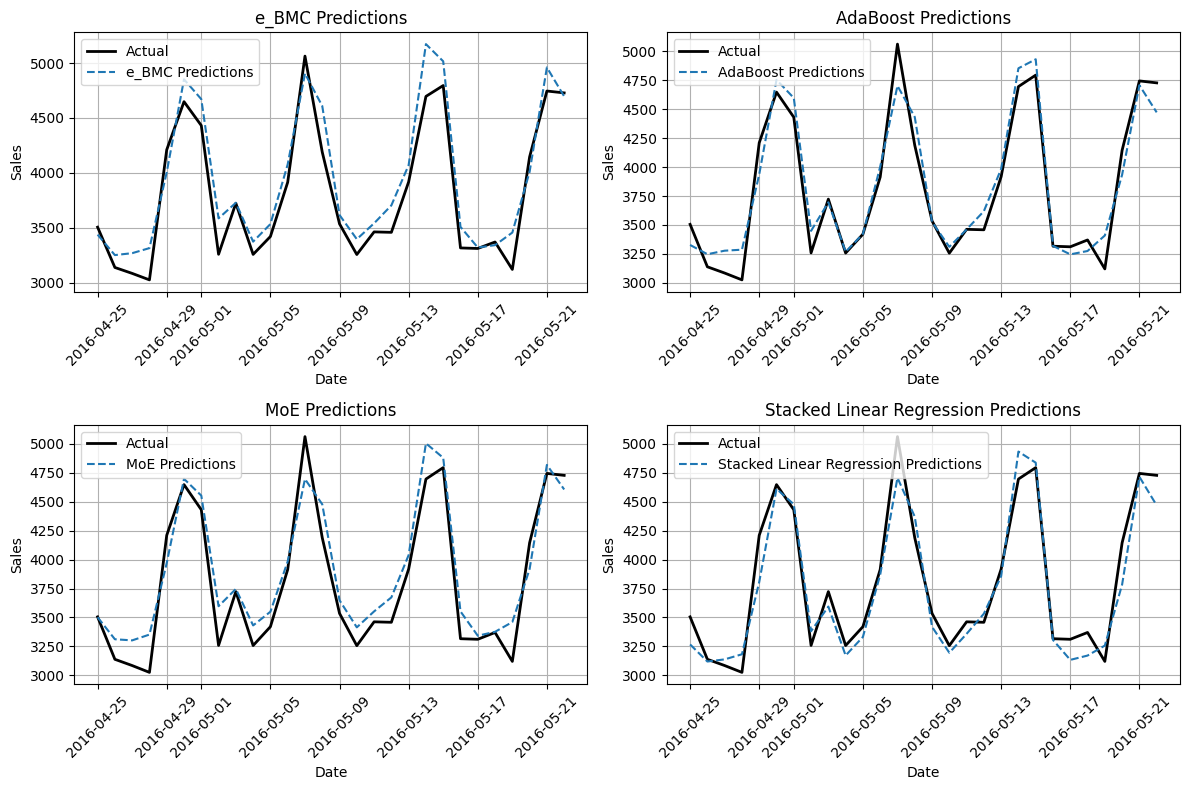

In [59]:
grouped = merged_df.groupby('date').sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

predictions = ['predicted_e_BMC', 'predicted_AdaBoost', 'predicted_MoE', 'predicted_Stacked_LinearReg']
titles = ['e_BMC Predictions', 'AdaBoost Predictions', 'MoE Predictions', 'Stacked Linear Regression Predictions']

for ax, pred, title in zip(axes, predictions, titles):
    ax.plot(grouped['date'], grouped['actual'], label='Actual', color='black', linewidth=2)
    ax.plot(grouped['date'], grouped[pred], label=title, linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [60]:
LightGBM_results_28 = pd.read_excel('LightGBM_results_28.xlsx')
LSTM_results_28 = pd.read_excel('LSTM_results_28.xlsx')
Prophet_results_28 = pd.read_excel('Prophet_results_28.xlsx')
SARIMA_results_28 = pd.read_excel('SARIMA_results_28.xlsx')
XGBoost_results_28 = pd.read_excel('XGBoost_results_28.xlsx')

In [61]:
LightGBM_predicted = LightGBM_results_28['predicted_sales']
LSTM_predicted = LSTM_results_28['Predicted']
SARIMA_predicted = SARIMA_results_28['predicted']
XGBoost_predicted = XGBoost_results_28['predicted']
Prophet_predicted = Prophet_results_28['yhat']

In [69]:
individual_models = pd.DataFrame({
    'LightGBM': LightGBM_predicted,
    'LSTM': LSTM_predicted,
    'Prophet': Prophet_predicted,
    'SARIMA': SARIMA_predicted,
    'XGBoost': XGBoost_predicted,
    'date': LightGBM_results_28['date'],
    'actual': LightGBM_results_28['actual'],    
})

In [71]:
individual_models

,LightGBM,LSTM,Prophet,SARIMA,XGBoost,date,actual
0,32.893489,52.522701,23.865259,42.199289,34.104744,2016-04-25,48
1,32.893489,69.548492,18.940642,34.997204,30.484797,2016-04-26,35
2,32.893489,55.100895,20.042981,36.052217,30.707727,2016-04-27,34
3,32.893489,68.947388,23.667728,37.389180,34.643425,2016-04-28,67
4,41.383913,71.794426,44.877879,63.884267,53.437386,2016-04-29,63
...,...,...,...,...,...,...,...
8395,4.340514,0.566711,8.574407,9.350410,12.436089,2016-05-18,0
8396,4.340514,-1.433770,9.268800,10.217225,13.795193,2016-05-19,5
8397,5.282888,-2.204044,11.398149,11.593126,15.543206,2016-05-20,9
8398,5.348172,0.417761,12.728285,12.846782,17.101051,2016-05-21,5


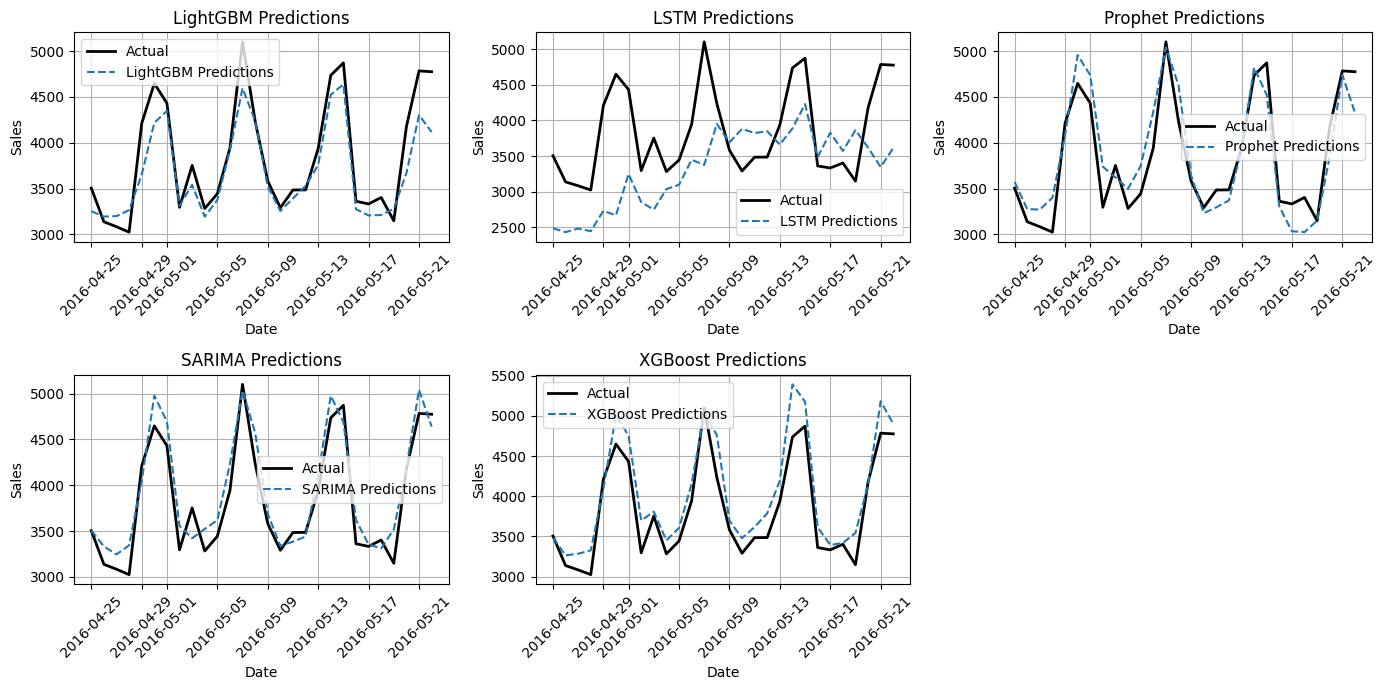

In [81]:
grouped_individual = individual_models.groupby('date').sum().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(14, 7))

axes = axes.flatten()

predictions = ['LightGBM', 'LSTM', 'Prophet', 'SARIMA', 'XGBoost']
titles = ['LightGBM Predictions', 'LSTM Predictions', 'Prophet Predictions', 'SARIMA Predictions', 'XGBoost Predictions']

for ax, pred, title in zip(axes, predictions, titles):
    ax.plot(grouped_individual['date'], grouped_individual['actual'], label='Actual', color='black', linewidth=2)
    ax.plot(grouped_individual['date'], grouped_individual[pred], label=title, linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    ax.grid(True)

axes[-1].axis('off')

plt.tight_layout()
plt.show()
